## 6.6 Uma Aplicação em Odometria Visual

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
mtx = np.array([[772.07218515,   0.        , 634.15206573],
                [  0.        , 771.9959048 , 366.5862172 ],
                [  0.        ,   0.        ,   1.        ]])
dist = np.array([[ 0.09361794, -0.22823167,  0.00027023, -0.00095334,  0.09892737]])

S = np.array([[ 3.86626825e+00, -7.10264597e+01,  1.29863410e+02],
       [-1.45832507e+02, -3.83402794e+00,  1.82359590e+00],
       [ 3.22595808e-03,  1.25526699e+00,  1.00000000e+00]])
mtx2 = np.float32([[4,  0,     0],
                   [0, -4, 4*105],
                   [0,  0,     1]])
dim = (4*297, 4*210)
tipo_mapa = cv2.CV_32FC1

---

1 - Calcule a matriz Q da reprojeção completa e o mapa correspondente via initUndistortRectifyMap. Reproduza os resultado da Figuras 6.26, 6.27 e 6.28.

a matriz de transformação no espaço global L' é dada por:
$$
L' = Q^{-1}L*Q
$$

In [3]:
# valores obtidos com a função
# imagem2global de um notebook anterior
y_max = 333.522
y_min = -320.964
x_max = 439.217
x_min = 62.422

s = 1

Q = np.array([[s,  0, -s*x_min],
              [0, -s,  s*y_max],
              [0,  0,        1]])

In [4]:
Q

array([[  1.   ,   0.   , -62.422],
       [  0.   ,  -1.   , 333.522],
       [  0.   ,   0.   ,   1.   ]])

In [5]:
mapa_x, mapa_y = cv2.initUndistortRectifyMap(mtx, dist, S, Q, dim, tipo_mapa)

Resultado da figura 6.26:

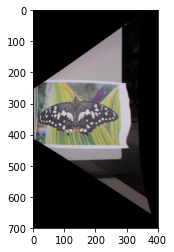

In [6]:
brabuleta = cv2.imread("brabuleta_horizontal.jpg")
borda = cv2.BORDER_CONSTANT
brabuleta = cv2.remap(brabuleta, mapa_x, mapa_y, cv2.INTER_LINEAR, borderMode=borda)
plt.xlim(0, 400)
plt.ylim(700, 0)
plt.imshow(brabuleta)

Resultado da figura 6.27:

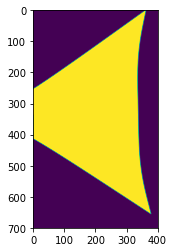

In [7]:
mascara = np.ones([720, 1280], dtype="uint8")*255
borda = cv2.BORDER_CONSTANT
mascara = cv2.remap(mascara, mapa_x, mapa_y, cv2.INTER_LINEAR, borderMode=borda)
plt.xlim(0, 400)
plt.ylim(700, 0)
plt.imshow(mascara)

Resultado da figura 6.28:

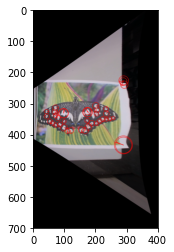

In [8]:
surf = cv2.xfeatures2d.SURF_create(10000)
kp, desc = surf.detectAndCompute(brabuleta, mascara)
brabuleta_com_surf = cv2.drawKeypoints(brabuleta, kp, brabuleta, (255,0,0), flags=5)
plt.xlim(0, 400)
plt.ylim(700, 0)
plt.imshow(brabuleta_com_surf)

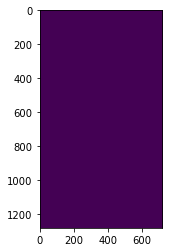

In [9]:
plt.imshow(np.ones([1280, 720], dtype="uint8")*255)

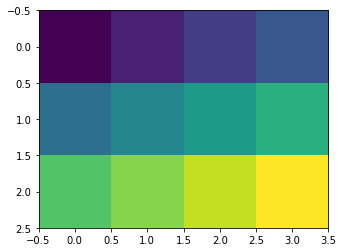

In [10]:
plt.imshow(np.arange(12).reshape(3,4))